# Code to get best hyper-parameters instantiations & plot confusion matrices

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
%matplotlib
from cycler import cycler
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np

# scikit-optimize
import skopt
from skopt.plots import *

import seaborn as sn

Using matplotlib backend: TkAgg


# Get best hyper-parameters instantiations

In [2]:
def objective(params):
    pass

In [11]:
# afficher les instantiation d'hyper-parametres des meilleurs modèles
def best_model_hyperparameter_instantiation(revisions):
    for revision, title in revisions:
        res = skopt.load('../generated/5.5/bayesOptResults.5.5.3.' + str(revision) + '-' + title + '.sav')
        print('Best Hyperparameter Instantiation for revision %d.%s' % (revision, title))
        print(res.x)

In [12]:
revisions = [
    # ------------------------------------------------------------- 5.5.3.1
    # ------------------------------------------- all positions, all users, all days
    (1, 'Bag'),
    (1, 'Hand'),
    (1, 'Hips'),
    (1, 'Torso'),
    
    # ------------------------------------------------------------- 5.5.3.2
    # ------------------------------------------- split users
    # ------------------------------------------- user1
    (2, 'Bag-User1'),
    (2, 'Hand-User1'),
    (2, 'Hips-User1'),
    (2, 'Torso-User1'),
    # ------------------------------------------- user2
    (2, 'Bag-User2'),
    (2, 'Hand-User2'),
    (2, 'Hips-User2'),
    (2, 'Torso-User2'),
    # ------------------------------------------- user3
    (2, 'Bag-User3'),
    (2, 'Hand-User3'),
    (2, 'Hips-User3'),
    (2, 'Torso-User3'),
    
    # ------------------------------------------------------------- 5.5.3.4
    # ------------------------------------------- all users, all days
    # ------------------------------------------- 10 folds
    (4, 'Bag-10folds'),
    (4, 'Hand-10folds'),
    (4, 'Hips-10folds'),
    # (4, 'Torso-10folds'),
    # ------------------------------------------- 5 folds
    (4, 'Bag-5folds'),
    (4, 'Hand-5folds'),
    (4, 'Hips-5folds'),
    (4, 'Torso-5folds'),
    # ------------------------------------------- split users
    # ------------------------------------------- user1
    (4, 'Bag-User1'),
    (4, 'Hand-User1'),
    (4, 'Hips-User1'),
    (4, 'Torso-User1'),
    # ------------------------------------------- user2
    (4, 'Bag-User2'),
    (4, 'Hand-User2'),
    (4, 'Hips-User2'),
    (4, 'Torso-User2'),
    # ------------------------------------------- user3
    (4, 'Bag-User3'),
    (4, 'Hand-User3'),
    (4, 'Hips-User3'),
    (4, 'Torso-User3'),
]
best_model_hyperparameter_instantiation(revisions)

Best Hyperparameter Instantiation for revision 1.Bag
[0.1, 23, 13, 10, 10, 15, 11, 9, 9, 15, 9, 13, 11, 9, 11, 13, 11, 11, 13, 10, 10, 13, 12, 0.5782045205937982, 1701, 0.14400725390336536]
Best Hyperparameter Instantiation for revision 1.Hand
[0.003221761109279506, 21, 12, 15, 9, 15, 13, 10, 9, 9, 10, 12, 11, 12, 12, 10, 10, 9, 13, 12, 15, 15, 11, 0.5777908662426398, 1514, 0.1912755686829743]
Best Hyperparameter Instantiation for revision 1.Hips
[0.1, 25, 14, 10, 10, 15, 14, 12, 15, 11, 10, 14, 13, 9, 15, 11, 10, 12, 14, 12, 14, 13, 9, 0.5959484500304997, 2048, 0.4046947707239381]
Best Hyperparameter Instantiation for revision 1.Torso
[0.0909083489514063, 21, 15, 9, 9, 9, 14, 10, 12, 11, 10, 10, 12, 11, 15, 12, 9, 10, 14, 10, 13, 15, 10, 0.5821446783239402, 1723, 0.36974766198580306]
Best Hyperparameter Instantiation for revision 2.Bag-User1
[0.001, 21, 9, 9, 10, 9, 15, 9, 11, 9, 9, 15, 9, 11, 15, 13, 10, 13, 9, 10, 15, 15, 12, 0.5810791772935887, 2048, 0.15457472653345586]
Best Hyper

# Plot confusion matrices

In [38]:
#confusion_matrix = np.loadtxt('generated/5.5/confusion_matrix.5.5.3.5-10-folds-model-10.sav')
confusion_matrix = np.loadtxt('generated/5.5/confusion/confusion_matrix.5.5.3.10-10-folds-model-384.sav')
confusion_matrix
# np.set_printoptions(formatter={'all':lambda x: str(x)})

array([[1.17e+03, 5.70e+01, 1.26e+02, 1.00e+00, 2.00e+01, 7.60e+01,
        5.40e+01, 1.80e+01, 6.10e+01],
       [9.30e+01, 2.61e+02, 1.80e+01, 0.00e+00, 2.70e+01, 2.90e+01,
        7.30e+01, 6.50e+01, 7.80e+01],
       [6.70e+01, 8.00e+00, 4.41e+02, 0.00e+00, 2.30e+01, 1.00e+00,
        1.60e+01, 3.00e+00, 1.40e+01],
       [0.00e+00, 0.00e+00, 3.00e+00, 6.50e+01, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00],
       [5.30e+01, 2.00e+00, 5.00e+00, 0.00e+00, 2.17e+02, 0.00e+00,
        0.00e+00, 2.00e+00, 4.00e+00],
       [3.10e+01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 4.44e+02,
        3.20e+01, 1.00e+00, 0.00e+00],
       [3.60e+01, 1.70e+01, 5.00e+00, 0.00e+00, 3.00e+00, 9.00e+00,
        2.18e+02, 0.00e+00, 2.90e+01],
       [2.10e+01, 2.00e+01, 3.00e+00, 0.00e+00, 3.00e+00, 6.00e+00,
        1.50e+01, 3.09e+02, 1.36e+02],
       [5.70e+01, 1.00e+01, 4.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 2.40e+01, 4.18e+02]])

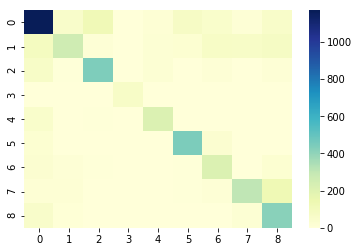

In [39]:
# sn.set(font_scale=1.4)
g = sn.heatmap(confusion_matrix, cmap="YlGnBu")

In [40]:
# Another method from Scikit documentation
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    return fig

Normalized confusion matrix
[[7.39102969e-01 3.60075805e-02 7.95957044e-02 6.31711939e-04
  1.26342388e-02 4.80101074e-02 3.41124447e-02 1.13708149e-02
  3.85344283e-02]
 [1.44409938e-01 4.05279503e-01 2.79503106e-02 0.00000000e+00
  4.19254658e-02 4.50310559e-02 1.13354037e-01 1.00931677e-01
  1.21118012e-01]
 [1.16928447e-01 1.39616056e-02 7.69633508e-01 0.00000000e+00
  4.01396161e-02 1.74520070e-03 2.79232112e-02 5.23560209e-03
  2.44328098e-02]
 [0.00000000e+00 0.00000000e+00 4.41176471e-02 9.55882353e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.87279152e-01 7.06713781e-03 1.76678445e-02 0.00000000e+00
  7.66784452e-01 0.00000000e+00 0.00000000e+00 7.06713781e-03
  1.41342756e-02]
 [6.10236220e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.74015748e-01 6.29921260e-02 1.96850394e-03
  0.00000000e+00]
 [1.13564669e-01 5.36277603e-02 1.57728707e-02 0.00000000e+00
  9.46372240e-03 2.83911672e-02 6.87697161e-01 0.00000000e

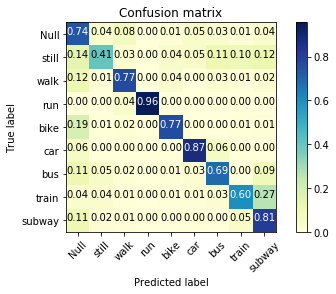

In [41]:
%matplotlib inline
fig = plot_confusion_matrix(
    confusion_matrix,
    ['Null', 'still', 'walk', 'run', 'bike', 'car', 'bus', 'train', 'subway'],
    normalize=True,
    title='Confusion matrix',
    cmap='YlGnBu'
)
fig.savefig('./confusion-matrices/confusion_matrix-5-5-3-5-AllPositionsFused-10-folds-model-10.svg',
            format='svg')

# Show confusion matricies of all models obtained through BO

Normalized confusion matrix
[[0.29311434 0.         0.22678459 0.45735944 0.00442198 0.01326595
  0.00189514 0.         0.00315856]
 [0.10714286 0.         0.27018634 0.57453416 0.02950311 0.00310559
  0.         0.         0.01552795]
 [0.04537522 0.         0.39965096 0.54973822 0.         0.
  0.         0.         0.0052356 ]
 [0.         0.         0.23529412 0.76470588 0.         0.
  0.         0.         0.        ]
 [0.12014134 0.         0.12367491 0.53003534 0.22614841 0.
  0.         0.         0.        ]
 [0.06889764 0.         0.1988189  0.51574803 0.0019685  0.17322835
  0.04133858 0.         0.        ]
 [0.10094637 0.         0.08832808 0.65930599 0.         0.03154574
  0.11987382 0.         0.        ]
 [0.15009747 0.         0.2417154  0.44639376 0.03703704 0.02534113
  0.00194932 0.04093567 0.05653021]
 [0.17087379 0.         0.32621359 0.41359223 0.00970874 0.00970874
  0.         0.         0.06990291]]
Normalized confusion matrix
[[6.57612129e-01 2.84270373e-02

Normalized confusion matrix
[[0.71636134 0.05622236 0.0739103  0.00126342 0.00947568 0.0530638
  0.03853443 0.02021478 0.03095389]
 [0.13354037 0.40217391 0.0310559  0.         0.03416149 0.10714286
  0.12888199 0.07298137 0.09006211]
 [0.12565445 0.04188482 0.73298429 0.         0.02792321 0.0052356
  0.03141361 0.008726   0.02617801]
 [0.         0.         0.05882353 0.94117647 0.         0.
  0.         0.         0.        ]
 [0.21908127 0.01766784 0.02120141 0.         0.70318021 0.00353357
  0.         0.00353357 0.03180212]
 [0.06692913 0.00393701 0.         0.         0.         0.85629921
  0.06496063 0.0019685  0.00590551]
 [0.07886435 0.00946372 0.01577287 0.00315457 0.00946372 0.03470032
  0.76656151 0.         0.08201893]
 [0.04288499 0.06432749 0.00584795 0.         0.00389864 0.00779727
  0.01559454 0.65107212 0.208577  ]
 [0.10679612 0.01941748 0.00582524 0.         0.         0.00582524
  0.0038835  0.05825243 0.8       ]]
Normalized confusion matrix
[[0.59823121 0.02

Normalized confusion matrix
[[0.73404927 0.0473784  0.08022742 0.00442198 0.01263424 0.05116867
  0.02842704 0.01137081 0.03032217]
 [0.13198758 0.3757764  0.04037267 0.         0.05124224 0.07453416
  0.13509317 0.07608696 0.11490683]
 [0.14659686 0.0104712  0.7399651  0.         0.04013962 0.0034904
  0.03490401 0.0034904  0.02094241]
 [0.         0.         0.05882353 0.94117647 0.         0.
  0.         0.         0.        ]
 [0.24381625 0.00353357 0.04946996 0.00353357 0.67491166 0.
  0.         0.00353357 0.02120141]
 [0.06692913 0.0019685  0.         0.         0.         0.86220472
  0.05905512 0.         0.00984252]
 [0.10094637 0.04416404 0.01577287 0.         0.         0.04416404
  0.7444795  0.         0.05047319]
 [0.02729045 0.06822612 0.01169591 0.         0.01559454 0.01559454
  0.01364522 0.61013645 0.23781676]
 [0.14174757 0.02135922 0.00970874 0.00194175 0.         0.00582524
  0.00776699 0.04660194 0.76504854]]
Normalized confusion matrix
[[7.39734681e-01 4.35881

/home/hamidi/current-work/shl-experiments/env3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Normalized confusion matrix
[[0.73215414 0.0530638  0.0795957  0.00126342 0.0107391  0.04358812
  0.03221731 0.01831965 0.02905875]
 [0.14751553 0.36335404 0.04968944 0.         0.04347826 0.06521739
  0.09161491 0.12111801 0.11801242]
 [0.10645724 0.03141361 0.76614311 0.         0.02966841 0.0017452
  0.02966841 0.0104712  0.02443281]
 [0.         0.         0.13235294 0.86764706 0.         0.
  0.         0.         0.        ]
 [0.15547703 0.02473498 0.03533569 0.         0.73498233 0.
  0.         0.00353357 0.0459364 ]
 [0.07283465 0.00393701 0.         0.         0.         0.85826772
  0.06299213 0.         0.0019685 ]
 [0.0851735  0.02839117 0.0126183  0.         0.00630915 0.05362776
  0.70662461 0.00315457 0.10410095]
 [0.05068226 0.07212476 0.00584795 0.         0.01364522 0.00389864
  0.0331384  0.62378168 0.19688109]
 [0.12621359 0.01553398 0.0038835  0.         0.         0.01359223
  0.00194175 0.03883495 0.8       ]]
Normalized confusion matrix
[[0.72710044 0.04674668 

Normalized confusion matrix
[[4.62413140e-01 1.26342388e-03 3.97346810e-01 6.06443462e-02
  1.26342388e-03 6.31711939e-04 7.45420088e-02 6.31711939e-04
  1.26342388e-03]
 [1.18012422e-01 0.00000000e+00 6.24223602e-01 8.22981366e-02
  7.76397516e-03 0.00000000e+00 1.67701863e-01 0.00000000e+00
  0.00000000e+00]
 [2.44328098e-02 0.00000000e+00 9.47643979e-01 2.26876091e-02
  0.00000000e+00 0.00000000e+00 1.74520070e-03 1.74520070e-03
  1.74520070e-03]
 [0.00000000e+00 0.00000000e+00 5.00000000e-01 5.00000000e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.54063604e-02 0.00000000e+00 7.59717314e-01 4.94699647e-02
  8.48056537e-02 0.00000000e+00 1.06007067e-02 0.00000000e+00
  0.00000000e+00]
 [9.44881890e-02 0.00000000e+00 4.58661417e-01 6.29921260e-02
  0.00000000e+00 1.37795276e-01 2.44094488e-01 0.00000000e+00
  1.96850394e-03]
 [1.79810726e-01 0.00000000e+00 3.94321767e-01 2.83911672e-02
  3.15457413e-03 0.00000000e+00 3.94321767e-01 0.00000000e

Normalized confusion matrix
[[6.97409981e-01 4.67466835e-02 8.21225521e-02 6.31711939e-04
  1.20025268e-02 3.91661402e-02 6.82248895e-02 1.38976627e-02
  3.97978522e-02]
 [1.42857143e-01 3.32298137e-01 5.59006211e-02 0.00000000e+00
  3.26086957e-02 4.96894410e-02 1.87888199e-01 1.10248447e-01
  8.85093168e-02]
 [1.29144852e-01 1.57068063e-02 7.36474695e-01 0.00000000e+00
  3.66492147e-02 6.98080279e-03 3.49040140e-02 6.98080279e-03
  3.31588133e-02]
 [0.00000000e+00 0.00000000e+00 2.94117647e-02 9.70588235e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.04946996e-01 3.53356890e-03 2.47349823e-02 0.00000000e+00
  7.31448763e-01 0.00000000e+00 3.53356890e-03 3.53356890e-03
  2.82685512e-02]
 [5.70866142e-02 1.96850394e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.34645669e-01 8.85826772e-02 1.37795276e-02
  3.93700787e-03]
 [6.94006309e-02 2.20820189e-02 1.57728707e-02 0.00000000e+00
  1.26182965e-02 1.57728707e-02 7.94952681e-01 0.00000000e

Normalized confusion matrix
[[0.6456096  0.03853443 0.18445989 0.00252685 0.00568541 0.02274163
  0.0530638  0.00947568 0.03790272]
 [0.17391304 0.24068323 0.15993789 0.0015528  0.00931677 0.02018634
  0.18322981 0.08540373 0.1257764 ]
 [0.04363002 0.01570681 0.83769634 0.0017452  0.02094241 0.0017452
  0.04537522 0.0034904  0.02966841]
 [0.         0.         0.16176471 0.83823529 0.         0.
  0.         0.         0.        ]
 [0.12014134 0.01766784 0.24734982 0.04240283 0.50530035 0.00353357
  0.00706714 0.01413428 0.04240283]
 [0.08267717 0.0019685  0.07480315 0.         0.         0.65551181
  0.10826772 0.03740157 0.03937008]
 [0.07886435 0.00630915 0.09463722 0.00315457 0.         0.02523659
  0.70031546 0.         0.09148265]
 [0.07212476 0.08576998 0.0662768  0.         0.         0.00779727
  0.0331384  0.58869396 0.14619883]
 [0.12621359 0.01359223 0.06407767 0.         0.         0.0038835
  0.01941748 0.04271845 0.73009709]]
Normalized confusion matrix
[[0.72962729 0.01

Normalized confusion matrix
[[0.52874289 0.037271   0.16550853 0.11054959 0.00315856 0.0265319
  0.07643714 0.01958307 0.03221731]
 [0.17236025 0.22204969 0.07608696 0.10403727 0.00931677 0.02329193
  0.2484472  0.09161491 0.05279503]
 [0.09598604 0.0122164  0.60907504 0.18673647 0.02792321 0.0034904
  0.02617801 0.0104712  0.02792321]
 [0.         0.         0.07352941 0.92647059 0.         0.
  0.         0.         0.        ]
 [0.19434629 0.12720848 0.19434629 0.13074205 0.29681979 0.
  0.01766784 0.01060071 0.02826855]
 [0.07480315 0.00393701 0.01968504 0.14173228 0.         0.57283465
  0.15354331 0.02559055 0.00787402]
 [0.10725552 0.00630915 0.04416404 0.13880126 0.         0.04100946
  0.6214511  0.         0.04100946]
 [0.14424951 0.0545809  0.07017544 0.08382066 0.00584795 0.01949318
  0.05653021 0.40155945 0.16374269]
 [0.21941748 0.01165049 0.03495146 0.11650485 0.         0.03106796
  0.00582524 0.08349515 0.49708738]]
Normalized confusion matrix
[[0.62539482 0.03537587 0

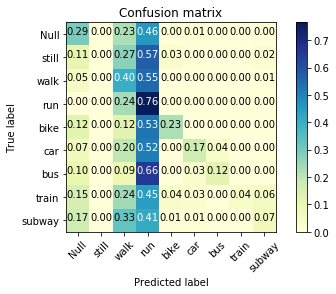

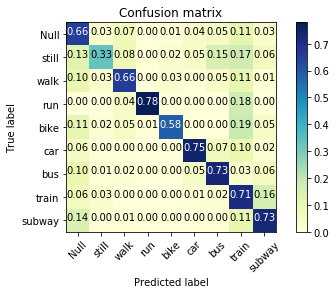

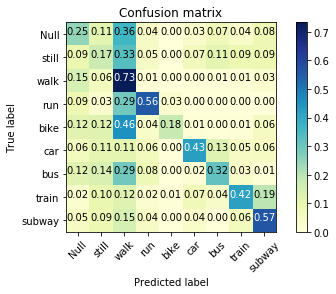

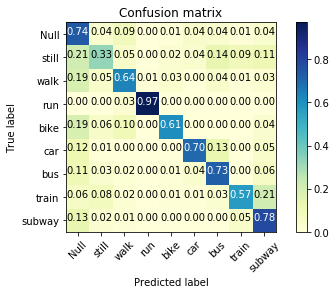

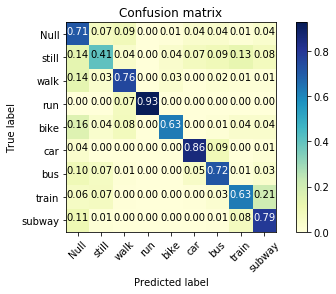

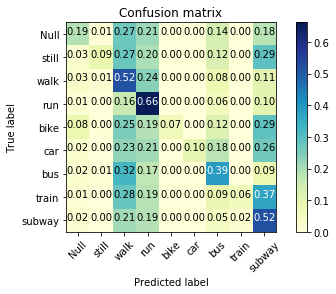

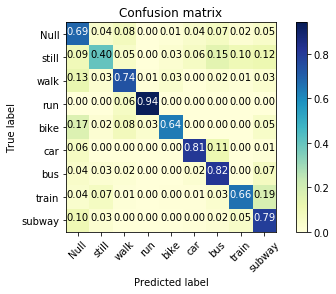

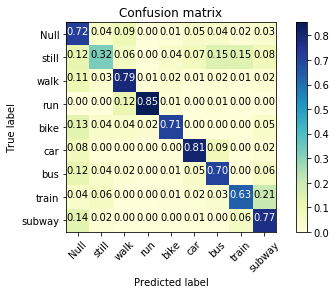

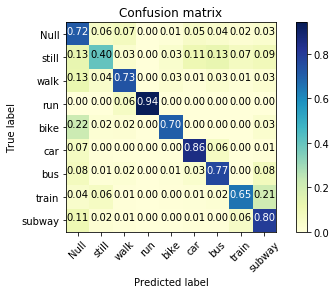

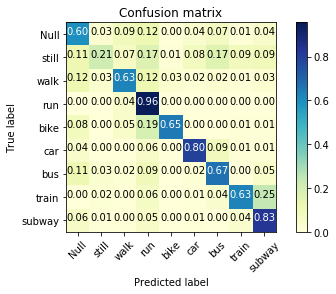

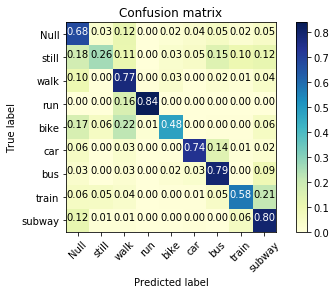

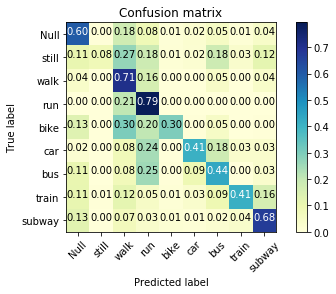

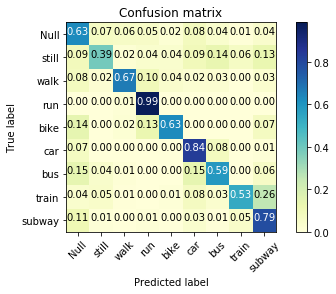

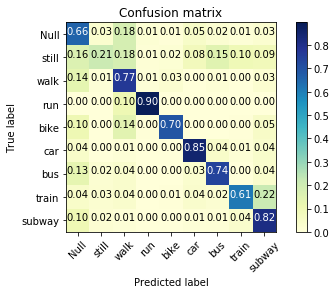

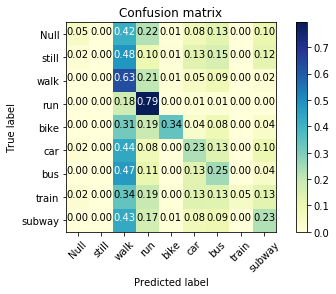

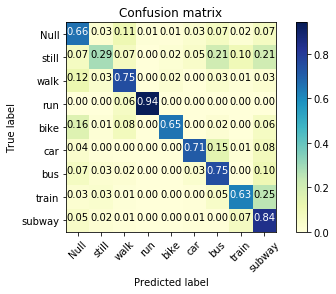

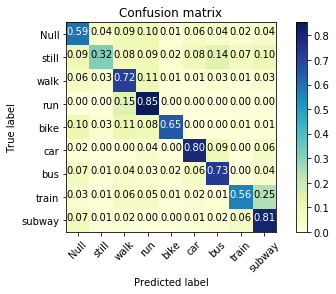

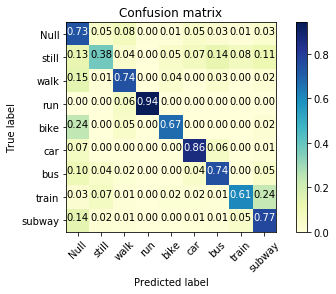

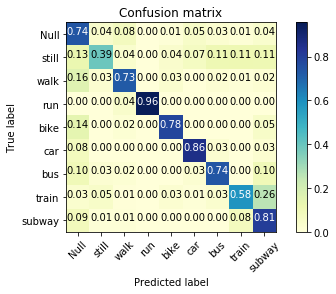

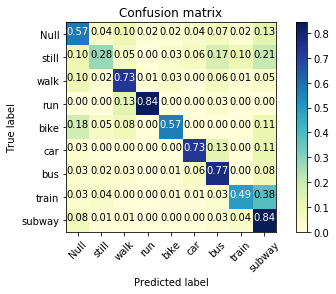

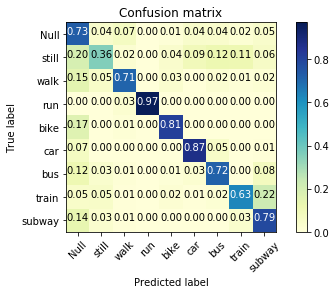

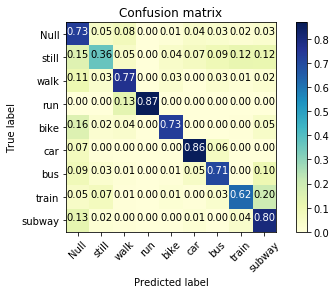

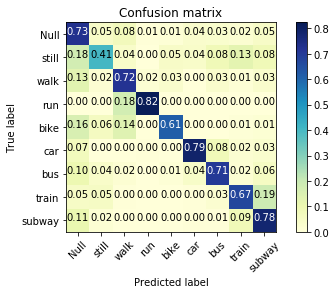

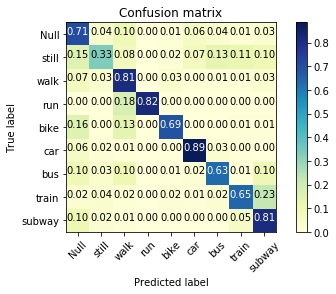

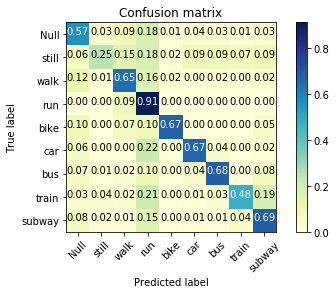

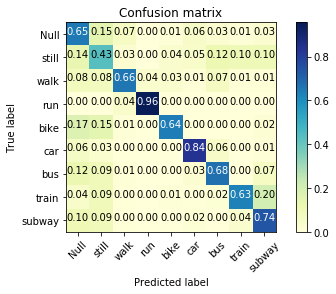

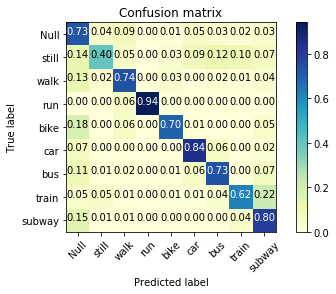

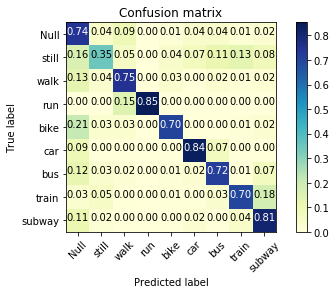

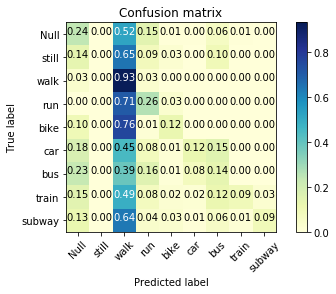

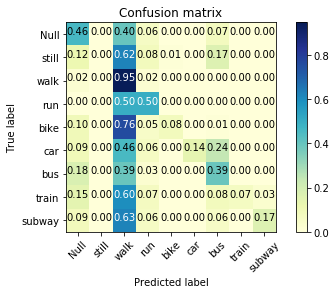

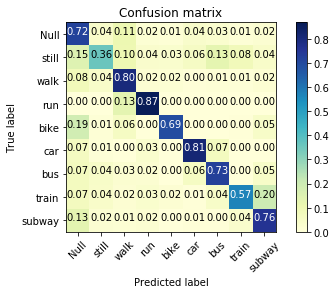

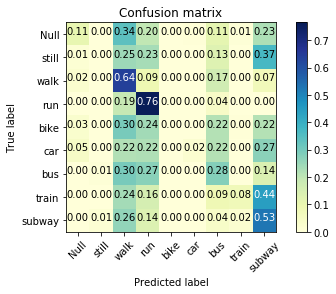

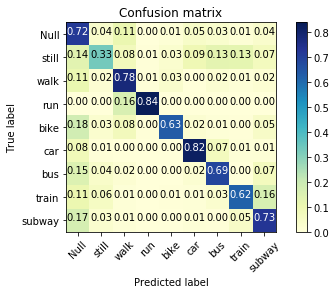

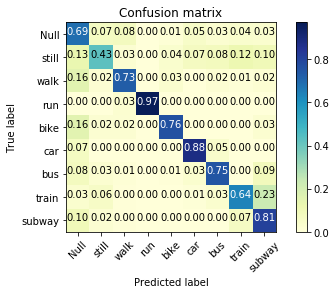

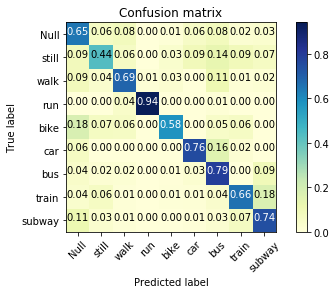

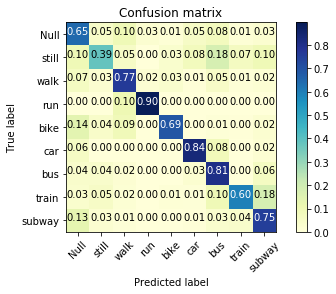

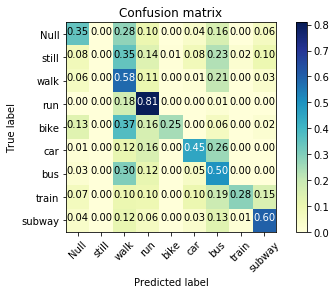

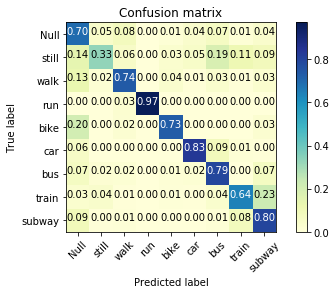

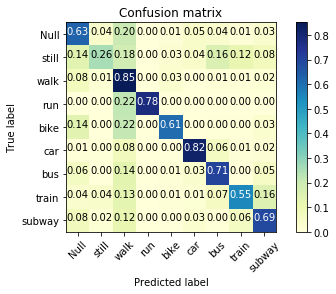

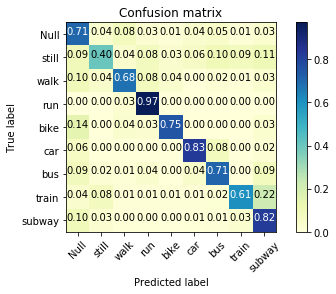

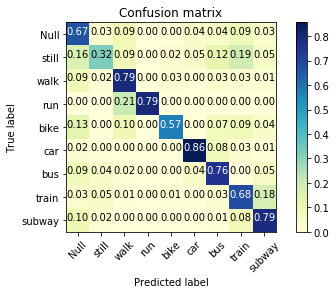

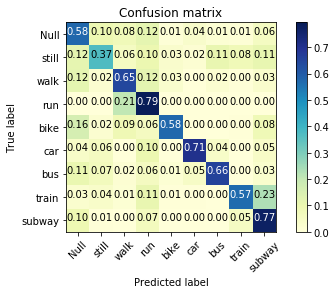

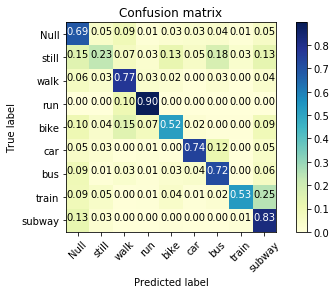

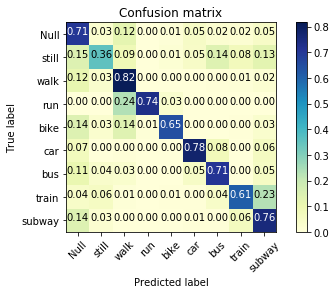

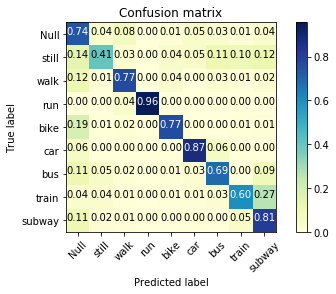

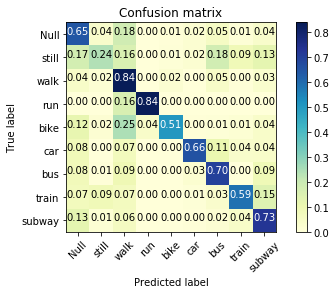

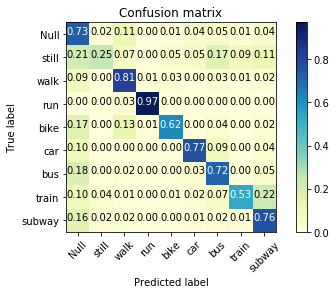

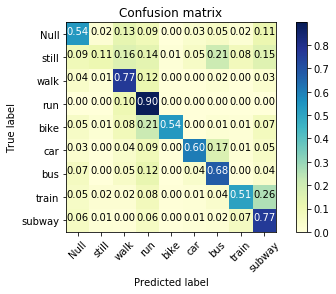

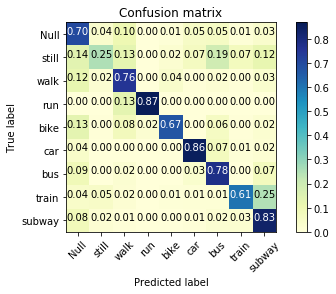

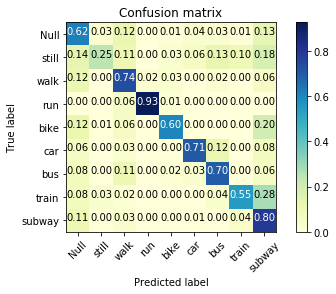

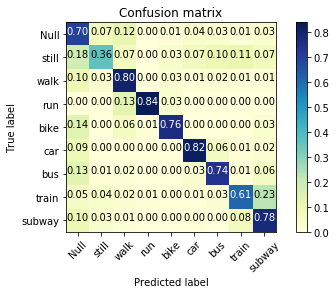

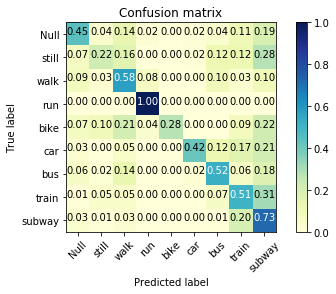

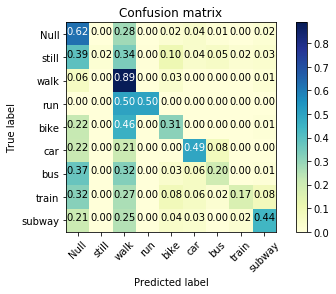

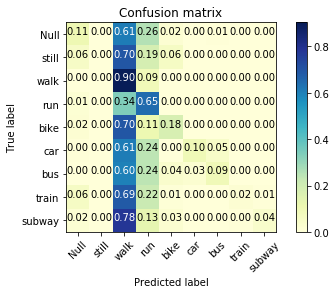

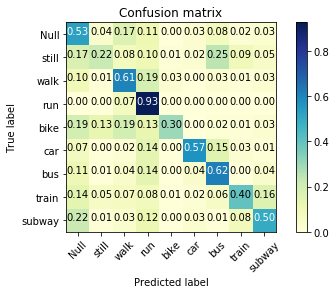

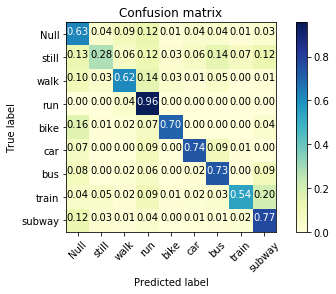

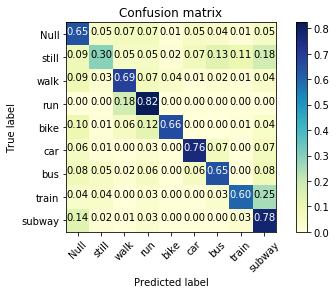

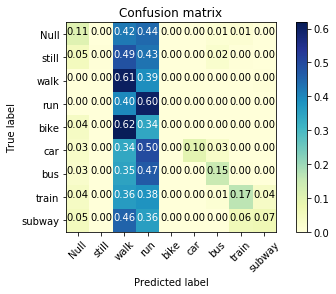

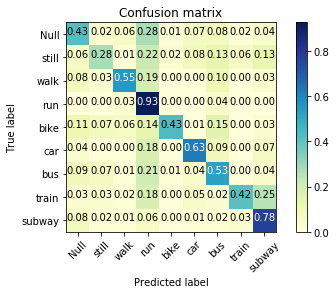

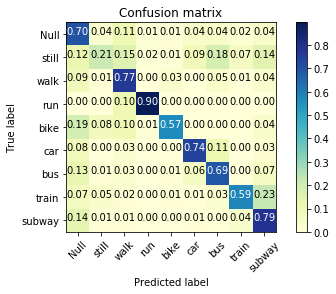

In [86]:
files = [f
         for f in os.listdir('generated/5.5/confusion/')
         if f.startswith('confusion_matrix.5.5.3.10-10-folds-model')
        ]
for file in files:
    confusion_matrix = np.loadtxt('generated/5.5/confusion/'+file)
    fig = plot_confusion_matrix(
        confusion_matrix,
        ['Null', 'still', 'walk', 'run', 'bike', 'car', 'bus', 'train', 'subway'],
        normalize=True,
        title='Confusion matrix',
        cmap='YlGnBu'
    )
    fig.savefig('./confusion-matrices/'+file+'.svg', format='svg')

# Area under the ROC

In [140]:
y = np.loadtxt('generated/5.5/y.5.5.3.5-10-folds-model-32.sav', dtype=np.int32)
y_pred = np.loadtxt('generated/5.5/y_pred.5.5.3.5-10-folds-model-32.sav')
#splits = np.genfromtxt('generated/5.5/splits.5.5.3.5-10-folds-model-32.sav', delimiter=' ')

import re
with open('generated/5.5/splits.5.5.3.5-10-folds-model-32.sav') as f:
    # f = [re.search('\[(.*?)\]', i) for i in f]
    f = [re.search('(?<=\[).+?(?=\])', i).group() for i in f]
#print(len(f))
    groups = [tuple(map(int, i.split(','))) for i in f]
len(groups)

train = groups[0::2]  # 2 is the step
test = groups[1::2]
splits = zip(train,test)

print(splits)

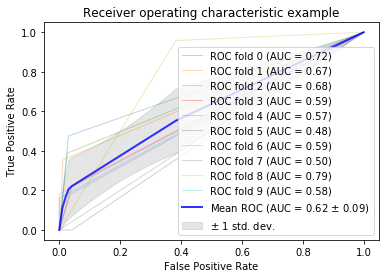

In [141]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8])
y_pred = label_binarize(y_pred, classes=[0,1,2,3,4,5,6,7,8])
n_classes = 9

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in splits:
    probas_ = np.stack([y_pred_[idx] for idx in test])
    y_test = np.stack([y[idx] for idx in test])
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test[:,1], probas_[:,1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
#plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [78]:
y = np.loadtxt('generated/5.5/confusion/y.5.5.3.10-10-folds-model-384.sav', dtype=np.int32)
splits = np.loadtxt('generated/5.5/splits.5.5.3.10-10-folds-model-384-ONLY-TEST-FOLDS-bis.sav', delimiter=',', dtype=np.int32)

import re
with open('generated/5.5/logits-to-probs-slurm-5.5.3.10-34-10folds-TESTING-iter-35.out') as f:
    f = [re.search('(?<=\[).+?(?=\])', i).group() for i in f]
    probas_ = [list(map(float, i.split())) for i in f]
    
print(len(f))

# Re-arrange `y` in order to fit order of `splits` (the order in which `probas_` were obtained)
y = [y[i] for i in splits]

5004


In [79]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [80]:
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8])
classes = ['Null', 'still', 'walk', 'run', 'bike', 'car', 'bus', 'train', 'subway']
n_classes = 9

y_test = y
probas_ = np.array(probas_)

In [81]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probas_[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probas_.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc_score(y_test.ravel(), probas_.ravel())

0.9362016082577582

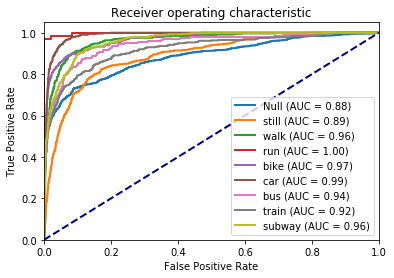

In [83]:
fig = plt.figure()
for i, klass in enumerate(classes):
    lw = 2
    plt.plot(fpr[i], tpr[i], # color='darkorange',
             lw=lw, label='%s (AUC = %0.2f)' % (klass, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

fig.savefig('./confusion-matrices/roc-curve-5-5-3-5-AllPositionsFused-10-folds-modelIter35.svg',
            format='svg')